In [13]:
from bsccm import download_dataset
dataset_path = download_dataset('./', tiny=True)
print('Downloaded dataset to ' + dataset_path)

Downloading...metadata 220...


Total Download Progress: 100%|███████████████| 490M/490M [00:47<00:00, 10.8MB/s]
Combining File chunks: 100%|██████████████████████| 1/1 [00:00<00:00,  7.41it/s]
Reading compressed files: 36500 files [00:02, 14969.08 files/s]


Decompressing to ./BSCCM-tiny...


Extracting Files: 100%|███████████████| 36500/36500 [00:10<00:00, 3554.43file/s]

Cleaning up
Complete
Downloaded dataset to ./BSCCM-tiny


In [14]:
from bsccm import BSCCM
import numpy as np
import matplotlib.pyplot as plt

dataset_path = './BSCCM-tiny'

dataset = BSCCM(dataset_path)

Opening BSCCM-tiny
Opened BSCCM-tiny


In [15]:
valid_indices = dataset.get_indices()

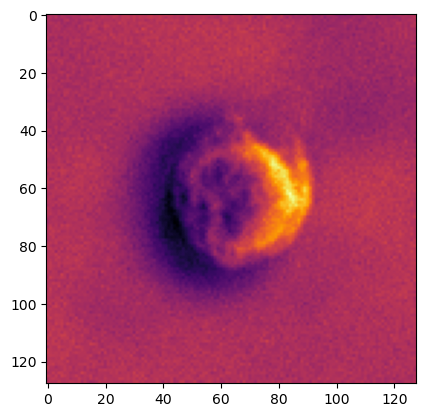

In [16]:
an_index = valid_indices[1]
image = dataset.read_image(an_index, channel='DPC_Left')
plt.imshow(image, cmap='inferno')

For all LED array images, the data are 128x128 pixels and have uint16 data type. However, they were collected on a 12 bit camera and thus have an intensity range from 0 to 4095.

Given below are 6 random 'Brightfield' images from te 3 class labels present in the dataset.

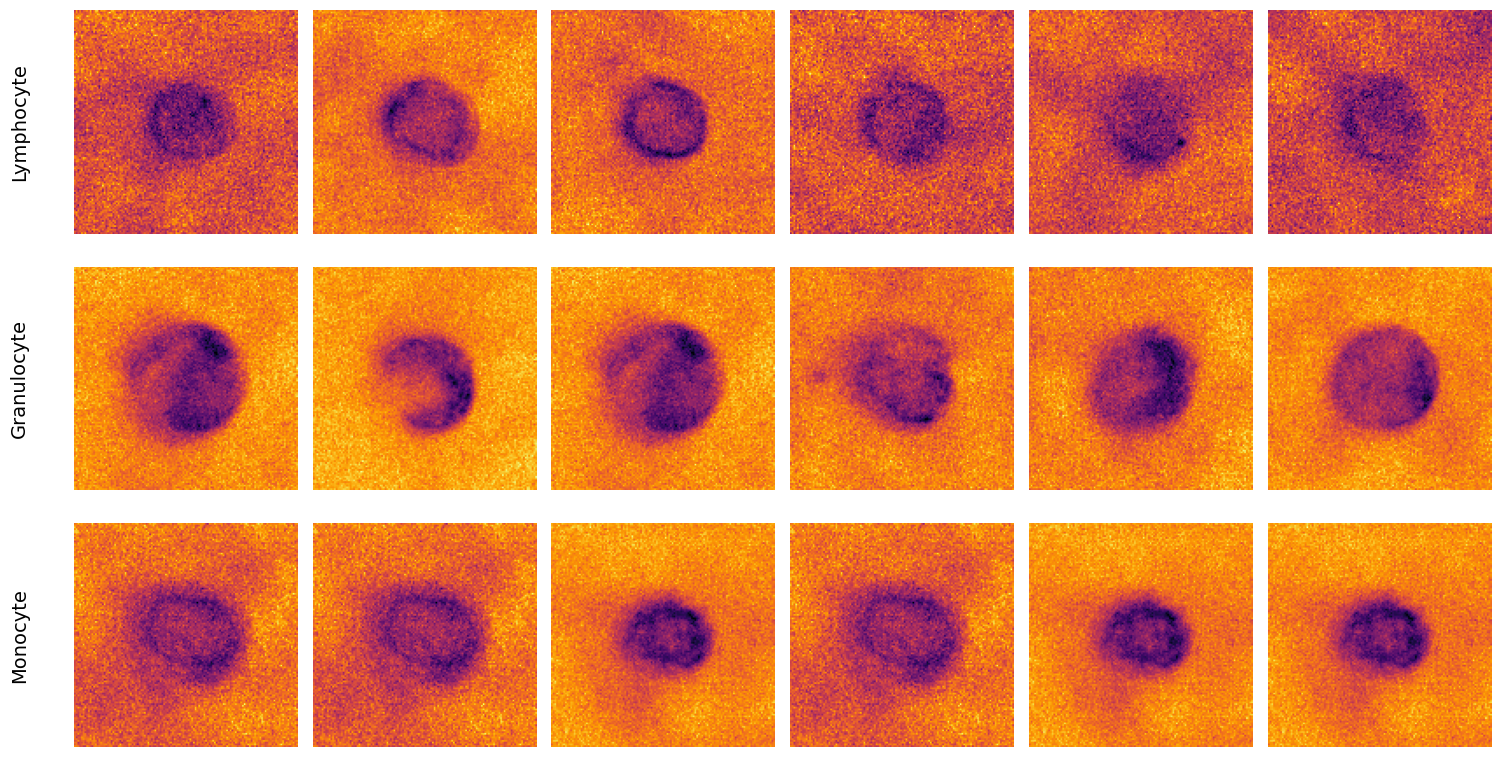

In [46]:
# Load the indices of the images and their labels (for the three class version)
indices, class_labels = dataset.get_cell_type_classification_data(ten_class_version=False)

# Show 6 examples of each class in three rows
fig, axs = plt.subplots(3, 6, figsize=(15, 8))
for i in range(3):
    for j in range(6):
        # Get the indices of the images in the current class
        class_indices = indices[class_labels == i]
        # Get the image at the current index
        image = dataset.read_image(np.random.choice(class_indices), channel='Brightfield')
        # Plot the image in the corresponding subplot
        axs[i, j].imshow(image, cmap='inferno')
        axs[i, j].axis('off')
# Add label
for i, label in enumerate(['Lymphocyte', 'Granulocyte', 'Monocyte']):
    axs[i, 0].text(-0.2, 0.5, label, fontsize=14, ha='right', va='center', transform=axs[i, 0].transAxes, rotation=90)

plt.tight_layout()

Fluorescence, which depending on the the sub-dataset either measures the light coming from one or more surface markers, or the cell's autofluorescence. This raw data can be processed to make more information measurements of surface marker expression

In [47]:
print('Fluorescence channels:')
channel_names = []
for name in dataset.global_metadata['fluorescence']['channel_names']:
    channel_names.append(name)
    print(name)

Fluorescence channels:
Fluor_690-
Fluor_627-673
Fluor_585-625
Fluor_550-570
Fluor_500-550
Fluor_426-446


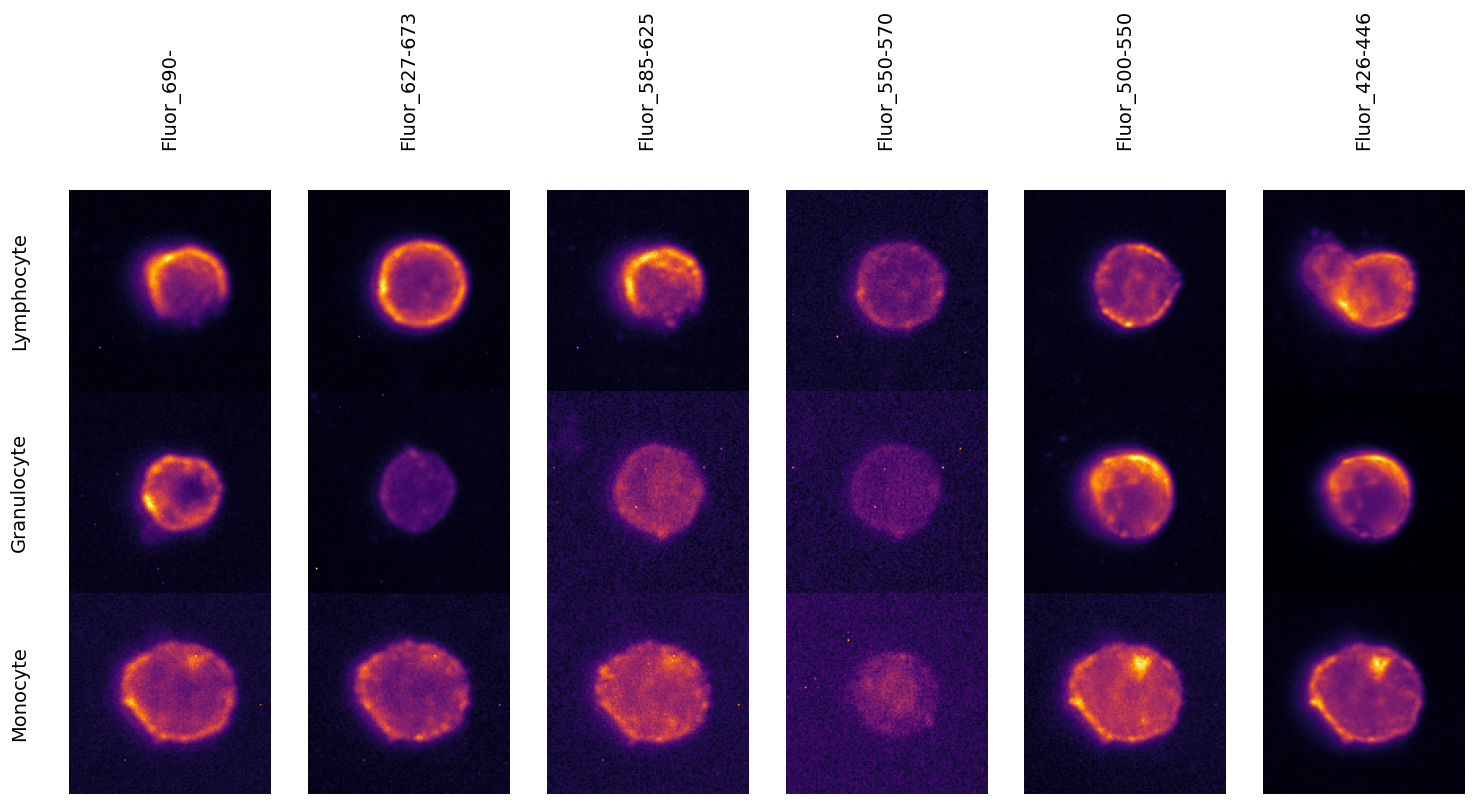

In [48]:
# Load the indices of the images and their labels (for the three class version)
indices, class_labels = dataset.get_cell_type_classification_data(ten_class_version=False)

# Show 6 examples of each class in three rows
fig, axs = plt.subplots(3, 6, figsize=(15, 8))
for i in range(3):
    # Get the indices of the images in the current class
    class_indices = indices[class_labels == i]
    # Get the image at the current index
    image_channel1 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_690-')
    image_channel2 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_627-673')
    image_channel3 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_585-625')
    image_channel4 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_550-570')
    image_channel5 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_500-550')
    image_channel6 = dataset.read_image(np.random.choice(class_indices), channel='Fluor_426-446')
    # Plot the image in the corresponding subplot
    axs[i, 0].imshow(image_channel1, cmap='inferno')
    axs[i, 0].axis('off')
    axs[i, 1].imshow(image_channel2, cmap='inferno')
    axs[i, 1].axis('off')
    axs[i, 2].imshow(image_channel3, cmap='inferno')
    axs[i, 2].axis('off')
    axs[i, 3].imshow(image_channel4, cmap='inferno')
    axs[i, 3].axis('off')
    axs[i, 4].imshow(image_channel5, cmap='inferno')
    axs[i, 4].axis('off')
    axs[i, 5].imshow(image_channel6, cmap='inferno')
    axs[i, 5].axis('off')
# Add label
for i, label in enumerate(['Lymphocyte', 'Granulocyte', 'Monocyte']):
    axs[i, 0].text(-0.2, 0.5, label, fontsize=14, ha='right', va='center', transform=axs[i, 0].transAxes, rotation=90)
    
for j, label in enumerate(['Fluor_690-', 'Fluor_627-673', 'Fluor_585-625', 'Fluor_550-570', 'Fluor_500-550', 'Fluor_426-446']):
    axs[0,j].text(0.5, 1.2, label, fontsize=14, ha = 'center', va='bottom', transform = axs[0,j].transAxes, rotation=90)

plt.tight_layout()

Global metadata also contains a bunch of other useful information like pixel size, exposure, etc

In [49]:
for key in dataset.global_metadata['led_array'].keys():
    print(key)
    
print('The illumination wavelength is: {} nm'.format(dataset.global_metadata['led_array']['wavelength_nm']))

channel_names
channel_indices
exposure_ms
wavelength_nm
pixel_size_um
objective
The illumination wavelength is: 515 nm


In [81]:
dataset.global_metadata

{'name': 'BSCCM-tiny',
 'led_array': {'channel_names': ['Brightfield',
   'DF_50',
   'DF_50_Bottom',
   'DF_50_Right',
   'DF_55',
   'DF_60',
   'DF_60_Bottom',
   'DF_60_Right',
   'DF_65',
   'DF_70',
   'DF_70_Bottom',
   'DF_70_Right',
   'DF_75',
   'DF_80',
   'DF_80_Bottom',
   'DF_80_Right',
   'DF_85',
   'DF_90',
   'DPC_Bottom',
   'DPC_Left',
   'DPC_Right',
   'DPC_Top',
   'LED119'],
  'channel_indices': {'Brightfield': 0,
   'DF_50': 1,
   'DF_50_Bottom': 2,
   'DF_50_Right': 3,
   'DF_55': 4,
   'DF_60': 5,
   'DF_60_Bottom': 6,
   'DF_60_Right': 7,
   'DF_65': 8,
   'DF_70': 9,
   'DF_70_Bottom': 10,
   'DF_70_Right': 11,
   'DF_75': 12,
   'DF_80': 13,
   'DF_80_Bottom': 14,
   'DF_80_Right': 15,
   'DF_85': 16,
   'DF_90': 17,
   'DPC_Bottom': 18,
   'DPC_Left': 19,
   'DPC_Right': 20,
   'DPC_Top': 21,
   'LED119': 22},
  'exposure_ms': {'Brightfield': 8,
   'DF_50': 29,
   'DF_50_Bottom': 58,
   'DF_50_Right': 58,
   'DF_55': 46,
   'DF_60': 62,
   'DF_60_Bottom'

In [74]:
for key in dataset.global_metadata.keys():
    print(key)

name
led_array
fluorescence
histology


In [58]:

# Show the surface_marker_dataframe dataframe
surface_marker_df = dataset.surface_marker_dataframe
dataset.surface_marker_dataframe

,Fluor_690-_total_raw,Fluor_690-_background,Fluor_627-673_total_raw,Fluor_627-673_background,Fluor_585-625_total_raw,Fluor_585-625_background,Fluor_550-570_total_raw,Fluor_550-570_background,Fluor_500-550_total_raw,Fluor_500-550_background,...,selection_gated_CD3_hi_CD_16_lo,selection_gated_CD16_hi_CD45_mid,selection_gated_CD16_hi_CD45_lomid,selection_gated_CD16_hi_CD45_lo,selection_gated_CD16_lo_CD45_lo,selection_gated_CD16_none_CD45_mid_and_hi,selection_gated_CD45_mid_CD_16_mid,selection_gated_CD45_hi_CD_16_lo,selection_gated_CD45_hi_CD_16_mid,selection_gated_CD45_hi_CD_16_hi
global_index,,,,,,,,,,,,,,,,,,,,,
30,80.280174,74.017822,92.825745,82.036209,78.291771,68.508064,53.840534,51.594341,122.134407,105.219803,...,False,False,False,False,False,False,False,False,False,False
281,84.439026,73.766899,96.709938,82.201134,83.121490,72.188400,55.668068,53.734089,122.852676,107.512589,...,False,False,False,False,False,False,False,False,False,False
307,83.524712,79.544556,104.874077,97.363228,94.569847,86.727585,60.379017,58.560394,145.880920,132.351624,...,False,False,False,False,False,False,False,False,False,False
584,76.998756,73.875816,100.921631,93.973412,85.801308,79.386421,62.139389,60.737484,134.319244,123.203392,...,False,False,False,False,False,False,False,False,False,False
1451,77.841934,75.459969,106.318001,100.236778,95.188652,88.820366,58.627598,56.944553,145.752975,135.340027,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410573,75.203903,73.607918,76.442604,71.296745,64.858589,59.111740,54.230991,52.704102,97.927544,88.430550,...,False,False,False,False,False,False,False,False,False,False
411302,71.616470,70.108345,79.173630,73.205658,62.052612,55.347382,56.207485,54.568600,102.358704,91.409050,...,False,False,False,False,False,False,False,False,False,False
411912,72.948479,71.917114,73.403297,69.991234,62.044205,58.000565,53.103512,51.872417,95.794693,89.078644,...,False,False,False,False,False,False,False,False,False,False


In [82]:
surface_marker_df.reset_index()

,global_index,Fluor_690-_total_raw,Fluor_690-_background,Fluor_627-673_total_raw,Fluor_627-673_background,Fluor_585-625_total_raw,Fluor_585-625_background,Fluor_550-570_total_raw,Fluor_550-570_background,Fluor_500-550_total_raw,...,selection_gated_CD3_hi_CD_16_lo,selection_gated_CD16_hi_CD45_mid,selection_gated_CD16_hi_CD45_lomid,selection_gated_CD16_hi_CD45_lo,selection_gated_CD16_lo_CD45_lo,selection_gated_CD16_none_CD45_mid_and_hi,selection_gated_CD45_mid_CD_16_mid,selection_gated_CD45_hi_CD_16_lo,selection_gated_CD45_hi_CD_16_mid,selection_gated_CD45_hi_CD_16_hi
0,30,80.280174,74.017822,92.825745,82.036209,78.291771,68.508064,53.840534,51.594341,122.134407,...,False,False,False,False,False,False,False,False,False,False
1,281,84.439026,73.766899,96.709938,82.201134,83.121490,72.188400,55.668068,53.734089,122.852676,...,False,False,False,False,False,False,False,False,False,False
2,307,83.524712,79.544556,104.874077,97.363228,94.569847,86.727585,60.379017,58.560394,145.880920,...,False,False,False,False,False,False,False,False,False,False
3,584,76.998756,73.875816,100.921631,93.973412,85.801308,79.386421,62.139389,60.737484,134.319244,...,False,False,False,False,False,False,False,False,False,False
4,1451,77.841934,75.459969,106.318001,100.236778,95.188652,88.820366,58.627598,56.944553,145.752975,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,410573,75.203903,73.607918,76.442604,71.296745,64.858589,59.111740,54.230991,52.704102,97.927544,...,False,False,False,False,False,False,False,False,False,False
996,411302,71.616470,70.108345,79.173630,73.205658,62.052612,55.347382,56.207485,54.568600,102.358704,...,False,False,False,False,False,False,False,False,False,False
997,411912,72.948479,71.917114,73.403297,69.991234,62.044205,58.000565,53.103512,51.872417,95.794693,...,False,False,False,False,False,False,False,False,False,False
998,412320,67.802551,66.449791,75.414505,70.495331,66.003502,60.283451,53.788311,52.431118,105.068413,...,False,False,False,False,False,False,False,False,False,False


This dataframe contains many columns, including raw fluorescence measurements, shading-corrected fluorescence (i.e. corrected for position in field of view), demixed surface marker measurements, and many intermediates used in this processing. Here, we highlight two particularly useful parts, the shading-corrected fluorescence, and the demixed surface marker estimates.

These can both be accessed with another two convenience functions, the first of which is:

In [84]:
has_surfacemarker_columns = surface_marker_df.keys()
has_surfacemarker_columns

Index(['Fluor_690-_total_raw', 'Fluor_690-_background',
       'Fluor_627-673_total_raw', 'Fluor_627-673_background',
       'Fluor_585-625_total_raw', 'Fluor_585-625_background',
       'Fluor_550-570_total_raw', 'Fluor_550-570_background',
       'Fluor_500-550_total_raw', 'Fluor_500-550_background',
       'Fluor_426-446_total_raw', 'Fluor_426-446_background',
       'Fluor_426-446_background_lowess', 'Fluor_500-550_background_lowess',
       'Fluor_550-570_background_lowess', 'Fluor_585-625_background_lowess',
       'Fluor_627-673_background_lowess', 'Fluor_690-_background_lowess',
       'Fluor_426_shading', 'Fluor_426-446_shading',
       'Fluor_426-446_shading_corrected', 'Fluor_500-550_shading',
       'Fluor_500-550_shading_corrected', 'Fluor_550-570_shading',
       'Fluor_550-570_shading_corrected', 'Fluor_585-625_shading',
       'Fluor_585-625_shading_corrected', 'Fluor_627-673_shading',
       'Fluor_627-673_shading_corrected', 'Fluor_690-_shading',
       'Fluor_690-_sh

In [85]:
# Get the indices of cells in batch 0 with no antibody stains
global_indices = dataset.get_indices(batch=1, antibodies='unstained')
fluor = dataset.get_corrected_fluor(global_indices)

Fluor is an N by 6 matrix, where N is the number of cells and 6 is the number of fluorescent channels. Since we specifically picked 'unstained' cells, this fluorescence corrsponds to the cell's inherent autofluorescence 

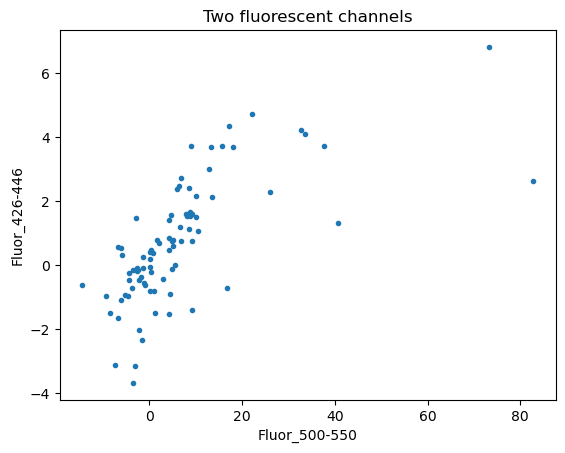

In [86]:
plt.plot(fluor[:, 4], fluor[:, 5], '.')
_ = plt.title('Two fluorescent channels')
_ = plt.xlabel(dataset.global_metadata['fluorescence']['channel_names'][4])
_ = plt.ylabel(dataset.global_metadata['fluorescence']['channel_names'][5])